In [155]:
import pandas as pd
import numpy as np

table = pd.read_csv('combined_table.csv')
print(table.head)

<bound method NDFrame.head of                 P/N  Cost to cost comp  Vendor  Q'ty   vendor confirm date  \
0        M623368013                NaN   JIAYE    300                    0   
1        K821651195                NaN  SHENKA   5936                    0   
2        K821651195                NaN  SHENKA     64                    0   
3      SG-32K2-BH-R                NaN  S LITE   1000                    0   
4       R811115C101                1.0   JIAYE   2880                    0   
...             ...                ...     ...    ...                  ...   
26829   R824279M102                1.0  ZEIHON   2800             20230818   
26830   R824279M102                1.0  ZEIHON   2800             20230818   
26831   R824279M102                1.0  ZEIHON   2800             20230818   
26832   R824279M102                1.0  ZEIHON   2800             20230818   
26833   R824279M102                1.0  ZEIHON   2800             20230818   

           ETD   total_value  sta

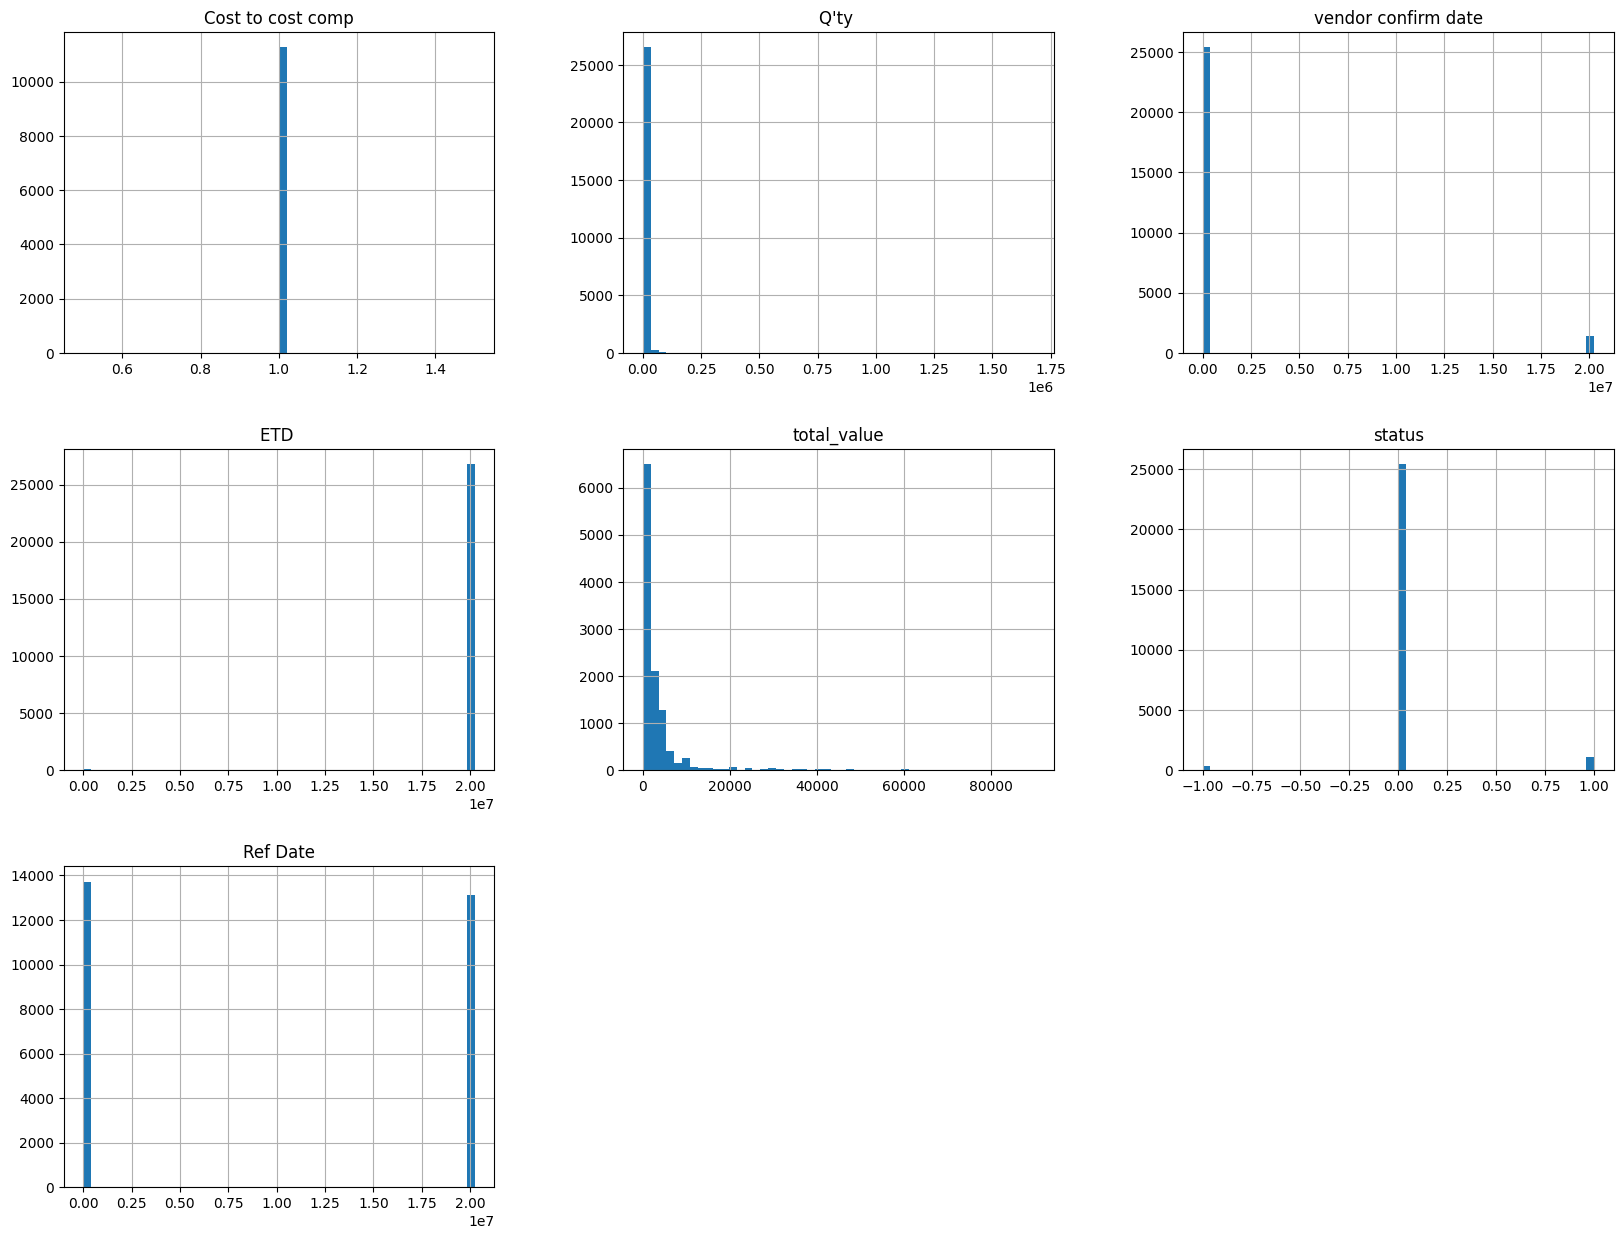

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
table.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-157-3e7d5e37e36c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = table.corr()


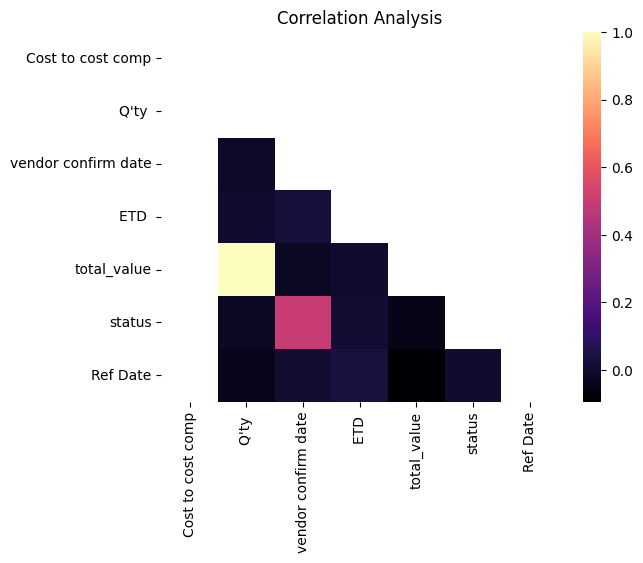

<ipython-input-157-3e7d5e37e36c>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = table.corr()


(7, 7)

In [157]:
# Show Correlation between all features.
import seaborn as sns
import numpy as np

corr = table.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=False,lw=0,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = table.corr()
corr_matrix.shape

**pipeline & feature scaling**

In [158]:
table = table.drop(columns = ['Ref Document'])
table = table.drop(columns = ['vendor confirm date'])
table = table.drop(columns = ['Cost to cost comp'])
#table = table.drop(columns = ['Q\'ty '])

In [159]:
table_label0 = table['status']
table_label1 = table['total_value']

In [160]:
table = table.drop(columns = ['status'])
table = table.drop(columns = ['total_value'])

In [161]:
table = table.fillna(0)
table

,P/N,Vendor,Q'ty,ETD,Ref Date
0,M623368013,JIAYE,300,20140509,0
1,K821651195,SHENKA,5936,20140514,20191010
2,K821651195,SHENKA,64,20140514,20191010
3,SG-32K2-BH-R,S LITE,1000,20140520,0
4,R811115C101,JIAYE,2880,20140520,0
...,...,...,...,...,...
26829,R824279M102,ZEIHON,2800,20231008,20220817
26830,R824279M102,ZEIHON,2800,20231008,20221020
26831,R824279M102,ZEIHON,2800,20231008,20230501
26832,R824279M102,ZEIHON,2800,20231008,20230531


In [162]:
#table = table.fillna(0)
#table

In [163]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
table_num = table.select_dtypes(include=[np.number])
imputer.fit(table_num)
imputer.statistics_

array([1.2000000e+03, 2.0180716e+07, 0.0000000e+00])

In [164]:
X = imputer.transform(table_num)
print(X.shape)

(26834, 3)


In [165]:
table_tr = pd.DataFrame(X, columns=table_num.columns,
                          index=table.index)

In [166]:
table_tr.head()

,Q'ty,ETD,Ref Date
0,300.0,20140509.0,0.0
1,5936.0,20140514.0,20191010.0
2,64.0,20140514.0,20191010.0
3,1000.0,20140520.0,0.0
4,2880.0,20140520.0,0.0


In [167]:
table_cat = table.select_dtypes(include=["object"])
table_cat = table_cat.fillna('0')
table_cat.head(10)

,P/N,Vendor
0,M623368013,JIAYE
1,K821651195,SHENKA
2,K821651195,SHENKA
3,SG-32K2-BH-R,S LITE
4,R811115C101,JIAYE
5,C423988050,JIAYE
6,C423988050,JIAYE
7,R811118102,JIAYE
8,R811118102,JIAYE
9,H211115122,JIAYE


In [168]:
from sklearn.preprocessing import OrdinalEncoder
# OrdinalEncoder encodes consecutive numbers for the categories (5 categories --> 0,1,2,3,4)
ordinal_encoder = OrdinalEncoder()
table_cat_encoded = ordinal_encoder.fit_transform(table_cat)
table_cat_encoded[:10]

array([[652.,  34.],
       [638.,  53.],
       [638.,  53.],
       [933.,  50.],
       [890.,  34.],
       [501.,  34.],
       [501.,  34.],
       [893.,  34.],
       [893.,  34.],
       [626.,  34.]])

In [169]:
ordinal_encoder.categories_

[array([' B120277040', '007702072', '007704093', ..., 'WAVE2EX', 'WAVE2F',
        'Wave2 '], dtype=object),
 array(['ANJIE', 'BELONG', 'BJLY', 'BME', 'BOCHI', 'CATHAY', 'CHADER',
        'CHINDEX', 'CHIPS', 'CMES', 'CYS', 'DEREN', 'ETONG',
        'FINAL SELECT', 'FONJAW', 'FORMOSAN', 'FORTUNE', 'FOSUN',
        'FOSUN JIANGSU', 'FOSUN MEDICAL TRADING HK', 'FOSUN TRADING HK',
        'FRONT', 'FU YUEN', 'GOLDEN CRYSTAL', 'GOOD HOUSE', 'GOOD HOUSE  ',
        'GOSTAR', 'HAINAN FOSUN', 'HENSUNG', 'HONGCHANG', 'HOSONG',
        'IPOWER', 'JAAN CHERNG', 'JIABIN', 'JIAYE', 'JIUFU', 'KANGWEI',
        'KEPO TECHNOLOGIES LLC', 'KINGSTATE', 'LEE SHIEN', 'MIRACLEAN',
        'MJ', 'MOZI', 'MUON', 'NINGKE', 'NOVENA', 'PENGSHENG',
        'PREMIER UNION', 'RE HONG', 'RENEW', 'S LITE', 'SANHOTAI', 'SENA',
        'SHENKA', 'SHUZE', 'SINO', 'SOMA', 'SUNFUNG', 'TIAN CHYI',
        'TONGNENG', 'TOP STANDARD', 'TOP STANDARD ', 'TOPWAY', 'TSM',
        'TSS FORTUNE', 'XFB', 'XIESHENG', 'YEUAN PAN', 'Y

In [170]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
table_cat_1hot = cat_encoder.fit_transform(table_cat)
table_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [171]:
cat_encoder.categories_

[array([' B120277040', '007702072', '007704093', ..., 'WAVE2EX', 'WAVE2F',
        'Wave2 '], dtype=object),
 array(['ANJIE', 'BELONG', 'BJLY', 'BME', 'BOCHI', 'CATHAY', 'CHADER',
        'CHINDEX', 'CHIPS', 'CMES', 'CYS', 'DEREN', 'ETONG',
        'FINAL SELECT', 'FONJAW', 'FORMOSAN', 'FORTUNE', 'FOSUN',
        'FOSUN JIANGSU', 'FOSUN MEDICAL TRADING HK', 'FOSUN TRADING HK',
        'FRONT', 'FU YUEN', 'GOLDEN CRYSTAL', 'GOOD HOUSE', 'GOOD HOUSE  ',
        'GOSTAR', 'HAINAN FOSUN', 'HENSUNG', 'HONGCHANG', 'HOSONG',
        'IPOWER', 'JAAN CHERNG', 'JIABIN', 'JIAYE', 'JIUFU', 'KANGWEI',
        'KEPO TECHNOLOGIES LLC', 'KINGSTATE', 'LEE SHIEN', 'MIRACLEAN',
        'MJ', 'MOZI', 'MUON', 'NINGKE', 'NOVENA', 'PENGSHENG',
        'PREMIER UNION', 'RE HONG', 'RENEW', 'S LITE', 'SANHOTAI', 'SENA',
        'SHENKA', 'SHUZE', 'SINO', 'SOMA', 'SUNFUNG', 'TIAN CHYI',
        'TONGNENG', 'TOP STANDARD', 'TOP STANDARD ', 'TOPWAY', 'TSM',
        'TSS FORTUNE', 'XFB', 'XIESHENG', 'YEUAN PAN', 'Y

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

table_num_tr = num_pipeline.fit_transform(table_num)

In [173]:
table_num_tr

array([[-0.20410846,  0.01484034, -0.97715523],
       [ 0.16342966,  0.01484489,  1.0222345 ],
       [-0.21949863,  0.01484489,  1.0222345 ],
       ...,
       [-0.041077  ,  0.09705842,  1.02614505],
       [-0.041077  ,  0.09705842,  1.02614802],
       [-0.041077  ,  0.09705842,  1.02616594]])

In [174]:
list(table_cat)

['P/N', 'Vendor']

In [175]:
from sklearn.compose import ColumnTransformer

num_attribs = list(table_num)
cat_attribs = list(table_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

table_prepared = full_pipeline.fit_transform(table)

In [176]:
print(table.shape)
print(table_prepared.shape)

(26834, 5)
(26834, 1164)


In [177]:
print(table_cat_1hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [178]:
print(table_prepared.toarray())

[[-0.20410846  0.01484034 -0.97715523 ...  0.          0.
   0.        ]
 [ 0.16342966  0.01484489  1.0222345  ...  0.          0.
   0.        ]
 [-0.21949863  0.01484489  1.0222345  ...  0.          0.
   0.        ]
 ...
 [-0.041077    0.09705842  1.02614505 ...  0.          1.
   0.        ]
 [-0.041077    0.09705842  1.02614802 ...  0.          1.
   0.        ]
 [-0.041077    0.09705842  1.02616594 ...  0.          1.
   0.        ]]


In [179]:
table_cat_1hot.shape

(26834, 1161)

**model training**

In [180]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(table_prepared, table_label0)

LinearRegression()

In [181]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, validation_set = train_test_split(table_prepared, test_size=0.2, random_state=42)
train_set_label, validation_set_label = train_test_split(table_label0, test_size=0.2, random_state=42)

X_train = train_set
y_train = train_set_label
X_valid = validation_set
y_valid = validation_set_label

In [182]:
# Try a few models here
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_valid)
lin_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
lin_rmse

0.21575564204047457

In [183]:
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(X_train, y_train)
lr.score(X_valid, y_valid)

0.11569672640648765

In [184]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([0.2144705 , 0.22140998, 0.22520459, 0.21740893, 0.21491651])

In [185]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_valid)
tree_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
tree_rmse

0.19448325803535432

In [186]:
tree_scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([0.20756534, 0.20202169, 0.21421638, 0.20786985, 0.21367199])

In [187]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_valid)
forest_mse = mean_squared_error(y_valid, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.1476921392063744

In [188]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([0.15851924, 0.15259023, 0.17370289, 0.16827537, 0.17026402])

***for total value prediction***

In [189]:
train_set, validation_set = train_test_split(table_prepared, test_size=0.2, random_state=42)
train_set_label, validation_set_label = train_test_split(table_label1, test_size=0.2, random_state=42)

X_train = train_set
y_train = train_set_label.fillna(0)
X_valid = validation_set
y_valid = validation_set_label.fillna(0)

In [190]:
# Try a few models here
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_valid)
lin_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
lin_rmse

2938.333348957971

In [191]:
from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(X_train, y_train)
lr.score(X_valid, y_valid)

0.6692539336630519

In [192]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([3254.29939774, 2861.53241364, 2992.24009952, 6831.55525926,
       3349.58926922])

In [193]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_valid)
tree_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
tree_rmse

539.4172236049471

In [200]:
tree_reg.score(X_valid, y_valid)

0.988853406123827

In [194]:
tree_scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([294.19437214, 437.79114579, 492.29418908, 303.59407704,
       321.60215731])

In [195]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_valid)
forest_mse = mean_squared_error(y_valid, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

445.05763584357885

In [201]:
forest_reg.score(X_valid, y_valid)

0.9924120393073642

In [196]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([291.09930112, 323.58203511, 308.33691744, 357.83570236,
       374.44391312])